In [1]:
##### This Jupyter notebook first calculates pairwise distances using the coordinates of selected residues, 
##### and then removes and selects features using variances, Fisher scores, and AMINO (Ravindra et al. doi.org/10.1039/C9ME00115H).
##### Please ensure that you have the AMINO codes (amino.py, amino_fast_mod.py, amino_main_mod.py) in the same directories. 
##### Please ensure you have properly set up the conda environment with all libraries.

##### Author: MO (latest update: Aug 18, 2023)
##### Updated: MR (latest update: May 28, 2024) 

In [2]:
##### User inputs #####
##### Only change if using your own system. If using our inputs, no need to change.

nDataPoints = 754  # Number of data points for each class (*note: each class should have the same number of data points)
dataset = 'PATH-TO/2_feature_extraction/sample_CA_coords.csv'  # Dataset to analyze
nclasses = 3  # Number of classes in the dataset
# i.e., for MFSD2A, it is 3 classes: OFS, OcS, IFS
nFeat = 1561 # This will be calculated in script step 3.1. 

In [3]:
### STEP 0. Import libraries
import amino_fast_mod as amino
import numpy as np
import pandas as pd
from sklearn.feature_selection import VarianceThreshold
from skfeature.function.similarity_based import fisher_score
import matplotlib.pyplot as plt
import gc
import seaborn as sns
import multiprocessing
import kneed
import fisher_score_mod as fsm

In [4]:
### STEP 1. Load input data
dfReduced = pd.read_csv('sample_CA_post_variance.csv')

In [5]:
dfReduced

,res39.137,res39.166,res39.167,res39.199,res39.201,res39.202,res39.233,res39.292,res39.293,res39.294,...,res472.491,res476.491,res477.491,res480.491,res481.491,res483.491,res484.491,res487.491,res488.491,class
0,48.516654,15.550879,11.782464,30.720754,36.832815,39.005820,47.006240,39.321359,36.689536,33.942176,...,30.878408,25.264388,23.555946,19.585102,17.624119,15.016122,13.801543,8.455018,8.115905,0
1,48.391578,15.821387,12.044111,32.146361,38.290039,39.929612,48.520857,35.755806,34.992586,33.156242,...,31.000032,26.593679,24.836052,20.399656,18.600287,15.646685,14.316205,9.584594,7.850335,0
2,48.898433,15.792147,12.199005,30.827692,36.019894,37.502753,46.577420,37.043157,33.935063,32.014517,...,29.571971,26.101338,24.007810,20.054880,17.730764,15.170421,13.881688,9.780254,7.825675,0
3,48.987007,15.815029,12.134304,31.922840,37.438372,38.124749,47.552086,34.514976,34.012088,32.750779,...,29.877113,25.897959,24.251504,20.081663,18.004194,15.031151,14.023508,9.551396,7.828224,0
4,50.778727,16.264586,12.559692,31.695209,37.816740,38.221784,47.203244,38.106838,37.139492,34.704269,...,29.727102,26.274326,24.131379,19.703288,17.837260,15.216900,13.649606,9.804452,7.693616,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2257,46.749142,13.288223,9.803680,32.612726,37.012895,38.300388,47.556014,43.548585,43.659433,40.167670,...,27.269869,22.993735,21.422974,16.686213,14.928687,12.062921,10.524907,6.062552,5.134690,2
2258,46.792536,13.969725,10.455201,32.990426,37.222045,38.535049,47.616553,41.644814,42.562491,39.068258,...,26.681468,22.503795,20.751810,16.736734,14.995892,12.388268,10.567933,6.428710,5.301362,2
2259,47.176977,13.284322,9.739256,32.111101,36.319202,37.142845,47.058533,43.688228,43.763872,40.519359,...,27.728934,23.740447,22.090317,17.511157,15.829649,12.607925,11.031930,6.645588,5.484716,2
2260,46.678082,14.040287,10.573478,32.101427,35.989655,37.122386,47.024755,44.893687,44.846179,41.329235,...,27.437300,23.264725,21.579145,16.790344,15.274260,12.411037,10.922860,6.239806,5.221792,2


In [ ]:
### STEP 2. Calculate Fisher Scores

In [6]:
X = dfReduced.drop('class', axis=1)
# Fisher's score
score = fsm.fisher_score(X.to_numpy(), dfReduced['class'].to_numpy(), mode='score')
print(score)
dfFScore = pd.DataFrame(score)
dfFScore.to_csv('fisher_scores_dfres.csv', encoding='utf-8', index=True, header=None)

[1.54141727 1.15628977 1.05692161 ... 6.42218712 3.54762652 6.74705269]


In [7]:
idx = fisher_score.fisher_score(X.to_numpy(), dfReduced['class'].to_numpy(), mode='index')   
print(idx)
dfFSidx = pd.DataFrame(idx)
dfFSidx.to_csv('fisher_indices_dfres.csv', encoding='utf-8', index=True, header=None)

[ 2817  2911  2915 ... 11143 12346 13421]


In [8]:
# Read the CSV file containing Fisher scores
df_scores = pd.read_csv('fisher_scores_dfres.csv')
df_scores.columns = ['ind', 'fs']

# Read the CSV file containing indices (if needed for reference)
df_indices = pd.read_csv('fisher_indices_dfres.csv')

# Sort the DataFrame by the 'fs' column in descending order
df_scores_sorted = df_scores.sort_values(by='fs', ascending=False)

# Save the sorted DataFrame to a new CSV file
df_scores_sorted.to_csv('fisher_scores_dfres_descending.csv', index=False)

In [9]:
print(df_scores.head())

   ind        fs
0    1  1.156290
1    2  1.056922
2    3  0.752849
3    4  0.199357
4    5  0.538849


In [10]:
df_scores_sorted

,ind,fs
2816,2817,22.899763
2910,2911,21.753037
2914,2915,21.748690
2815,2816,21.495208
2240,2241,21.387200
...,...,...
13750,13751,0.004540
10638,10639,0.004143
11142,11143,0.002991
12345,12346,0.001267


In [11]:
### STEP 3: Plot for Fisher Score vs Number of Features (pairwise distances)
### Author: MR (latest update: May 28, 2024) 

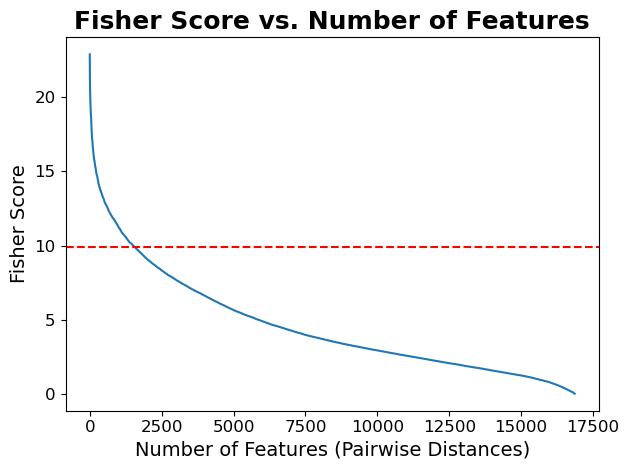

In [19]:
plt.plot(range(len(df_scores_sorted)), df_scores_sorted['fs'], label='Fisher Score')

plt.xlabel('Number of Features (Pairwise Distances)', fontsize=14)
plt.ylabel('Fisher Score', fontsize=14)
plt.title('Fisher Score vs. Number of Features', fontweight='bold', fontsize=18)
# Edit according to new threshold 
plt.axhline(y=9.886992282455704, color='r', linestyle='--')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
#plt.savefig('./fisher_knee_feature_num.pdf', dpi=300)
plt.show()


In [13]:
### STEP 3.1 Calculate nFeat
### Author: MR (latest update: May 28, 2024) 
### Using the Kneedle Algorithm (reference: 'Finding a "Kneedle" in a Haystack: Detecting Knee Points in System Behavior') 
### Will calculate the elbow point, where the scores plateau begins and this will be our nFeat

In [18]:
from kneed import KneeLocator

x = [*range(df_scores_sorted.shape[0])]

# Find the knee point
kneedle  = KneeLocator(x, df_scores_sorted['fs'], S=5, curve='convex', direction='decreasing')
knee_point = kneedle.knee
knee_value = kneedle.knee_y

print(f"The knee point is at x (nFeat) = {knee_point}, and score of: {kneedle.knee_y}")

The knee point is at x (nFeat) = 1561, and score of: 9.886992282455704


In [20]:
nFeat = kneedle.knee
reduced_X = X .iloc[:, idx[0:nFeat]]
reduced_X

,res68.318,res68.467,res68.471,res68.317,res64.318,res112.427,res64.317,res65.318,res65.317,res68.372,...,res240.334,res139.367,res261.410,res242.390,res242.373,res238.470,res61.471,res139.335,res128.474,res124.331
0,24.026101,26.525154,30.068969,20.671029,19.737772,19.920111,16.166162,23.356551,19.727071,37.878499,...,27.901577,42.640975,25.389284,34.098960,39.756237,32.433216,25.460680,37.641360,32.643743,34.455682
1,24.175613,27.185606,30.258787,20.773901,20.754147,19.197396,17.210757,24.368172,20.780409,37.471810,...,27.402202,42.147099,25.728808,34.639587,39.150025,32.524646,26.315306,37.005136,32.704291,32.883139
2,24.190502,26.182140,29.500731,20.961390,19.130339,18.877198,15.640563,22.598786,19.027718,37.745143,...,28.092725,43.236908,25.250044,34.468532,38.321672,30.214648,24.494115,38.656195,31.913822,34.002487
3,24.850979,26.621356,30.125337,21.215447,20.192440,19.164310,16.448576,23.441641,19.680377,38.484508,...,26.926364,43.475995,24.972167,34.140712,38.358869,31.376076,24.658680,38.143573,32.628660,33.683623
4,23.896853,25.825290,29.182509,20.300691,19.080201,19.049163,15.360977,22.572300,18.831759,37.116508,...,27.191498,43.615450,26.074847,33.397186,37.257179,30.608064,24.284169,38.460002,31.217543,33.630268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2257,14.567994,16.956198,19.992853,11.108811,11.064736,27.999422,7.315590,14.795542,11.060019,27.758954,...,20.673494,34.688837,32.460806,28.308814,33.276723,24.788109,18.842309,30.984600,26.061443,26.493847
2258,14.622736,17.364376,20.376434,11.185858,11.551850,28.774171,7.783037,15.259068,11.511137,27.783887,...,19.975745,35.004300,31.410709,28.665639,32.834159,24.097573,19.359447,31.225158,26.725168,27.200546
2259,14.767300,17.757189,20.732041,11.465896,11.168502,29.612250,7.657924,14.869171,11.377728,28.317967,...,20.508236,34.776354,33.316152,29.274490,33.553980,25.040195,19.710639,30.598204,26.178991,26.979772
2260,13.938958,17.142067,20.112252,10.526611,10.954284,29.838212,7.301167,14.673609,11.045575,27.925047,...,20.158735,35.490189,33.894733,28.386755,33.535694,24.426516,19.532261,30.515639,26.521738,26.583215


In [21]:
dfFinal = reduced_X
classList = dfReduced['class'].to_numpy()

In [22]:
del dfReduced
del X
del reduced_X

In [23]:
dfFinal

,res68.318,res68.467,res68.471,res68.317,res64.318,res112.427,res64.317,res65.318,res65.317,res68.372,...,res240.334,res139.367,res261.410,res242.390,res242.373,res238.470,res61.471,res139.335,res128.474,res124.331
0,24.026101,26.525154,30.068969,20.671029,19.737772,19.920111,16.166162,23.356551,19.727071,37.878499,...,27.901577,42.640975,25.389284,34.098960,39.756237,32.433216,25.460680,37.641360,32.643743,34.455682
1,24.175613,27.185606,30.258787,20.773901,20.754147,19.197396,17.210757,24.368172,20.780409,37.471810,...,27.402202,42.147099,25.728808,34.639587,39.150025,32.524646,26.315306,37.005136,32.704291,32.883139
2,24.190502,26.182140,29.500731,20.961390,19.130339,18.877198,15.640563,22.598786,19.027718,37.745143,...,28.092725,43.236908,25.250044,34.468532,38.321672,30.214648,24.494115,38.656195,31.913822,34.002487
3,24.850979,26.621356,30.125337,21.215447,20.192440,19.164310,16.448576,23.441641,19.680377,38.484508,...,26.926364,43.475995,24.972167,34.140712,38.358869,31.376076,24.658680,38.143573,32.628660,33.683623
4,23.896853,25.825290,29.182509,20.300691,19.080201,19.049163,15.360977,22.572300,18.831759,37.116508,...,27.191498,43.615450,26.074847,33.397186,37.257179,30.608064,24.284169,38.460002,31.217543,33.630268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2257,14.567994,16.956198,19.992853,11.108811,11.064736,27.999422,7.315590,14.795542,11.060019,27.758954,...,20.673494,34.688837,32.460806,28.308814,33.276723,24.788109,18.842309,30.984600,26.061443,26.493847
2258,14.622736,17.364376,20.376434,11.185858,11.551850,28.774171,7.783037,15.259068,11.511137,27.783887,...,19.975745,35.004300,31.410709,28.665639,32.834159,24.097573,19.359447,31.225158,26.725168,27.200546
2259,14.767300,17.757189,20.732041,11.465896,11.168502,29.612250,7.657924,14.869171,11.377728,28.317967,...,20.508236,34.776354,33.316152,29.274490,33.553980,25.040195,19.710639,30.598204,26.178991,26.979772
2260,13.938958,17.142067,20.112252,10.526611,10.954284,29.838212,7.301167,14.673609,11.045575,27.925047,...,20.158735,35.490189,33.894733,28.386755,33.535694,24.426516,19.532261,30.515639,26.521738,26.583215


In [144]:
### STEP 4. Make OP data for AMINO
gc.collect()
names = []
trajs = {}

for i in list(dfFinal.columns.values):
    names.append(i)
    trajs[i] = []

for j in range(len(list(dfFinal.columns.values))):
    trajs[names[j]] = dfFinal[names[j]].tolist()

all_ops = []

for k in names:
    all_ops.append(amino.OrderParameter(k, trajs[k]))

print("We have %d OPs in total." % len(all_ops))
print("OPs: %s" % names)

We have 1561 OPs in total.
OPs: ['res68.318', 'res68.467', 'res68.471', 'res68.317', 'res64.318', 'res112.427', 'res64.317', 'res65.318', 'res65.317', 'res68.372', 'res68.468', 'res68.470', 'res64.371', 'res110.427', 'res64.372', 'res113.427', 'res65.371', 'res67.471', 'res68.371', 'res67.318', 'res65.372', 'res112.425', 'res67.470', 'res66.318', 'res66.317', 'res68.373', 'res64.369', 'res68.369', 'res111.427', 'res67.467', 'res65.369', 'res68.475', 'res67.372', 'res112.424', 'res159.428', 'res64.471', 'res67.317', 'res68.370', 'res64.370', 'res66.371', 'res67.468', 'res65.471', 'res66.372', 'res110.428', 'res112.428', 'res67.371', 'res65.370', 'res110.425', 'res110.424', 'res68.474', 'res159.427', 'res68.472', 'res66.471', 'res111.428', 'res115.427', 'res66.369', 'res68.466', 'res67.369', 'res68.476', 'res64.475', 'res68.374', 'res67.475', 'res63.371', 'res64.373', 'res66.470', 'res113.425', 'res64.474', 'res67.472', 'res68.469', 'res65.470', 'res63.369', 'res64.470', 'res65.383', 're

In [145]:
### STEP 5. Perform AMINO
gc.collect()
# The -n flag can be used to specify a maximum number of order parameters in the reduced COLVAR (default = 20).
# The default value for bins if the -b flag is omitted is 50.
final_ops = amino.find_ops(all_ops, 5, 10, distortion_filename='distortion_array')   # find_ops(old_ops, max_outputs=20, bins=20, bandwidth=None, kernel='epanechnikov', distortion_filename=None, return_memo=False, weights=None)

myfile2 = open('output2_final_OPs.txt', 'w')
print("\nAMINO order parameters:")
for i in final_ops:
    myfile2.write("%s\n" % i)
    print(i)
myfile2.close()

myfile3 = open('output3_distortion_array.txt', 'w')
data_array = np.load('distortion_array.npy')
myfile3.write("%s\n" % data_array)
print("\nData summary:\n", data_array)
myfile3.close()

Selected bandwidth: 0.6072123286040407

Calculating all pairwise distances...
[########################################] | 100% Completed | 339.67 s
Checking 5 order parameters...
[<amino_fast_mod.OrderParameter object at 0x7f13ef0e1090>, <amino_fast_mod.OrderParameter object at 0x7f13e3e34150>, <amino_fast_mod.OrderParameter object at 0x7f13f0183a50>, <amino_fast_mod.OrderParameter object at 0x7f13b7c5a310>, <amino_fast_mod.OrderParameter object at 0x7f13f3eca150>, <amino_fast_mod.OrderParameter object at 0x7f11aa3f2a10>, <amino_fast_mod.OrderParameter object at 0x7f13b7c628d0>, <amino_fast_mod.OrderParameter object at 0x7f13b707df10>, <amino_fast_mod.OrderParameter object at 0x7f13f0d82a10>, <amino_fast_mod.OrderParameter object at 0x7f13b85de710>, <amino_fast_mod.OrderParameter object at 0x7f10a3f6d350>, <amino_fast_mod.OrderParameter object at 0x7f13b8555f10>, <amino_fast_mod.OrderParameter object at 0x7f12bc1dead0>, <amino_fast_mod.OrderParameter object at 0x7f13f38ddc90>, <amino_

In [146]:
dfAminoCols = pd.read_csv("output2_final_OPs.txt", names=["aminoColNames"])
aminoColNames = dfAminoCols['aminoColNames'].tolist()
dfAmino = dfFinal[aminoColNames]
dfAmino['class'] = np.array(zeroList + oneList + twoList)
dfAmino.to_csv('fisher-amino.csv', encoding='utf-8', index=False)

/tmp/ipykernel_4048/412344750.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfAmino['class'] = np.array(zeroList + oneList + twoList)
